## Breast Cancer Cell Classification Using k-Nearest Neighbors (kNN)

In the previous coding challenge, I used the k-Nearest Neighbors (kNN) algorithm to classify tumor samples as either benign or malignant based on various cell features. Through simple testing, I identified 𝑘=4 as a reasonable number of neighbors for classification. I also observed that the classes were imbalanced.

In this notebook, I take my analysis a step further and use Grid Search to automatically identify the best parameters for the kNN model. The goal is to improve the model’s accuracy by optimizing both the number of neighbors and the weighting strategy.

In [4]:
############################################
# Read data
############################################

# Import package
import pandas as pd

# File paths for the datasets (with actual file names included)
train_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_train.csv'
test_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_test.csv'
aim_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_aim.csv'

# Importing the datasets and treating 'null' strings as NaN values
df_train = pd.read_csv(train_file_path, na_values='null')
df_test = pd.read_csv(test_file_path, na_values='null')
df_aim = pd.read_csv(aim_file_path, na_values='null')

df_train.loc[:, 'id'] = df_train.loc[:, 'id'].astype('category')
df_train.loc[:, 'class'] = df_train.loc[:, 'class'].astype('category')
df_test.loc[:, 'id'] = df_test.loc[:, 'id'].astype('category')
df_test.loc[:, 'class'] = df_test.loc[:, 'class'].astype('category')
df_aim.loc[:, 'id'] = df_aim.loc[:, 'id'].astype('category')
df_train = df_train.dropna()

**Feature Selection and Target Definition**
In the next step, I extract the relevant input features bland_chromatin and mitoses from the training dataset. These features showed a moderate statistical correlation with the target variable class during my correlation analysis (Breast Cancer Challenge 1). Separating the feature matrix (features_train) and the target vector (target_train) is an essential step to prepare the data for training a machine learning model.

In [5]:
###########################################
# Create feature-Matrix and target vector  
###########################################

features_train = df_train[['bland_chromatin', 'mitoses']]
target_train = df_train['class']


**Create a Pipeline with Standardization and kNN**
To prepare the model properly, I’ll build a pipeline that first standardizes the input features and then applies the k-Nearest Neighbors classifier. This ensures that all preprocessing steps are consistently applied during training and prediction.

In [7]:
###########################################
# Pipeline with standardizition and kNN 
###########################################

# Import package
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Pipeline with standardization and kNN classifier
pipeline_std_knn = Pipeline([
    ('std', StandardScaler()),           # Step 1: Standardization
    ('knn', KNeighborsClassifier())      # Step 2: k-Nearest Neighbors classifier
])

###########################################
# Code notes:
#'std' applies standardization using StandardScaler() – crucial for distance-based algorithms like kNN.
#'knn' instantiates the k-Nearest Neighbors classifier.

**Define the Hyperparameter Search Space**

To find the most optimal configuration for the kNN classifier, performing a GridSearch is necessary, which automates the trial-and-error process.

Before I perform Grid Search, I need to define the range of hyperparameters I want to test. In this case, I’ll tune two key parameters of the kNN classifier:

n_neighbors: the number of neighbors to consider for classification, ranging from 1 to 25.

weights: the method for weighting neighbors – either uniform (equal influence) or distance-based (closer neighbors have more influence).

Since these hyperparameters are part of the KNeighborsClassifier defined in our pipeline (under the name 'knn'), I reference them using the format knn__parameter_name.

In [8]:
# Set up search space for GridSearchCV
search_space_grid = {
    'knn__n_neighbors': list(range(1, 26)),         # k values from 1 to 25
    'knn__weights': ['uniform', 'distance']         # Weighting methods
}


###########################################
# Code notes:
#knn__n_neighbors: Refers to the n_neighbors hyperparameter of the KNeighborsClassifier, as defined in the 'knn' step of the pipeline.
#knn__weights: Controls how neighbors influence the classification – either all equally ('uniform') or based on distance ('distance').

**Perform Grid Search to Find the Best kNN Model**

I will now instantiate a GridSearchCV object to perform a 5-fold cross-validation. This will allow testing of multiple combinations of hyperparameters for the kNN model and find the configuration that provides the highest accuracy.

I’ll use:

- pipeline_std_knn: the pipeline that standardizes the features and applies the kNN algorithm.
- search_space_grid: the defined search space for the hyperparameters (n_neighbors and weights).
- Accuracy as the evaluation metric to determine the best-performing model.
- 5-fold cross-validation to validate the model’s performance on different subsets of the data.
- Lastly, I’ll apply the Grid Search to the features and target vector.

In [9]:
###########################################
# Find the best kNN model via GridSearch
###########################################

# Import package
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV with the defined parameters
grid_search_for_k = GridSearchCV(
    estimator=pipeline_std_knn,                # The pipeline to be used
    param_grid=search_space_grid,              # The parameter grid for k and weights
    scoring='accuracy',                        # The evaluation metric: accuracy
    cv=5,                                      # 5-fold cross-validation
    n_jobs=-1                                   # Use all available CPU cores (optional)
)

# Fit the grid search to the data (features_train and target_train)
grid_search_for_k.fit(features_train, target_train)

# Output the best parameters and the best score found
print("Best Parameters: ", grid_search_for_k.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search_for_k.best_score_)

###########################################
# Code notes:
# estimator=pipeline_std_knn: I use the previously defined pipeline (pipeline_std_knn), which includes the standardization step and the kNN classifier.
#param_grid=search_space_grid: This defines the search space for the n_neighbors and weights hyperparameters, which will be tested during the Grid Search.
#scoring='accuracy': We use accuracy as the metric to evaluate the performance of each combination of hyperparameters.
#cv=5: This sets up 5-fold cross-validation, meaning the dataset will be split into 5 subsets, and the model will be trained and validated 5 times, each time using a different subset for validation.
#n_jobs=-1: This option uses all available CPU cores for faster computation (optional).
#After fitting, grid_search_for_k.best_params_ will give the best combination of n_neighbors and weights, and grid_search_for_k.best_score_ will show the best accuracy score achieved during cross-validation.

Best Parameters:  {'knn__n_neighbors': 14, 'knn__weights': 'uniform'}
Best Cross-Validation Accuracy:  0.9319571865443426


The Grid Search found the optimal combination of hyperparameters for your k-Nearest Neighbors (kNN) model:

**Best Parameters:**
n_neighbors = 14: This means the best-performing model considers 14 nearest neighbors to classify the tumor as benign or malignant.

weights = 'uniform': This indicates that all neighbors are given equal weight in the classification decision.

**Best Cross-Validation Accuracy:**
0.932 (or 93.2%): This is the highest accuracy achieved across the 5-fold cross-validation. It means that, on average, your kNN model correctly predicted whether tumors are benign or malignant 93.2% of the time.

I will now proceed with **evaluating the performance of the best model on the test data**. 

Here's the process:

- Extracting the best model from the Grid Search (grid_search_for_k.best_estimator_).
- Creating the feature matrix (features_test) and target vector (target_test) for the test dataset.
- Use the best model to predict the target values (target_test_pred) for the test data.

Note: Since the StandardScaler is part of the pipeline, the test data will automatically be standardized before making predictions.

In [10]:
###########################################
# Performance evaluation of the best model
###########################################

# Extract the best model from the grid search
model_knn_best = grid_search_for_k.best_estimator_

# Create the feature matrix and target vector for the test dataset
features_test = df_test[['bland_chromatin', 'mitoses']]
target_test = df_test['class']

# Predict the target using the best model (Reminder: standardization is automatically handled in the pipeline)
target_test_pred = model_knn_best.predict(features_test)

# Display the predictions
print("Predicted Target (First 10 values):", target_test_pred[:10])

Predicted Target (First 10 values): [0 0 1 1 1 0 1 0 0 0]


For the first 10 test samples, the model predicted whether each tumor is benign or malignant.

0 = Benign (good tumor).
1 = Malignant (cancerous tumor).

To **calculate the accuracy for the real target values and predicted target values of the test dataset**, the accuracy_score function from scikit-learn is useful.

In [11]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(target_test, target_test_pred)

# Display the accuracy
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8714


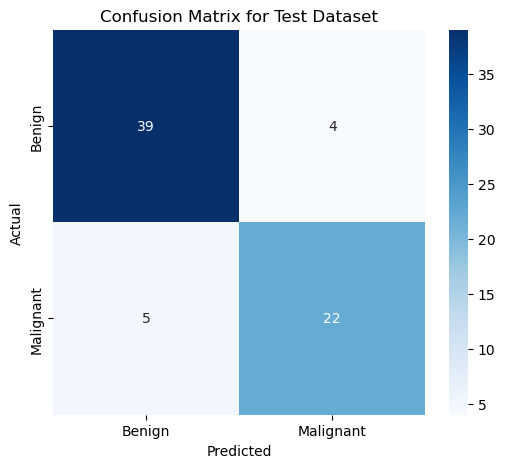

In [12]:
###########################################
# Visualize the performance of the model using a confusion matrix
###########################################

# Import package
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(target_test, target_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix for Test Dataset")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Using the best kNN model from your grid search to predict the benign or malignant classification for the new samples in the aim dataset.**

Breakdown of the steps:

- Creating the Feature Matrix (features_aim) for the aim dataset, which includes the columns 'bland_chromatin' and 'mitoses'.
- Predicting the Target using the best kNN model (model_knn_best) for the aim dataset.
- Saving the predictions in a new column 'class_pred' in df_aim.
- Display the first 5 rows of the updated df_aim to check the results.

Note: Since the pipeline includes standardization, the features will be automatically standardized before making predictions.

In [13]:
###########################################
# Predict bening / malign classification using best kNN on new samples from aim dataset
###########################################

# Create the feature matrix for the aim dataset
features_aim = df_aim[['bland_chromatin', 'mitoses']]

# Predict the target for the aim dataset using the best model from grid search
target_aim_pred = model_knn_best.predict(features_aim)

# Add the predictions as a new column 'class_pred' to the df_aim DataFrame
df_aim['class_pred'] = target_aim_pred

# Display the first 5 rows of df_aim to check the predictions
df_aim.head()


,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,class_pred
0,1,1347943,5,2,2,2,2,1,1,1,2,NaN,0
1,2,1148278,3,3,6,4,5,8,4,4,1,NaN,1
2,3,706426,5,5,5,2,5,10,4,3,1,NaN,1
3,4,1075123,3,1,2,1,2,1,2,1,1,NaN,0
4,5,1183240,4,1,2,1,2,1,2,1,1,NaN,0


In [15]:
###########################################
# Filter the predictions for malignant tumors 
###########################################

# Create a mask to filter for malignant tumor predictions (class_pred = 1)
malignant_mask = df_aim['class_pred'] == 1

# Filter the DataFrame to only include rows with malignant tumor predictions
malignant_samples = df_aim[malignant_mask]

# Count the number of malignant tumor predictions
num_malignant_samples = malignant_samples.shape[0]

# Display the result
print(f"Number of malignant tumor predictions: {num_malignant_samples}")

Number of malignant tumor predictions: 27
